# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.constants import data_folder, img_shape, nb_classes
from src.utils import init_notebook

In [2]:
init_notebook()

In [3]:
df = pd.read_csv(f"{data_folder}/raw/sample-dataset.csv", header=None)

In [4]:
df.shape

(3000, 785)

In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [6]:
print(f"{X.shape =}\n{y.shape =}")

X.shape =(3000, 784)
y.shape =(3000,)


<Axes: xlabel='0', ylabel='Count'>

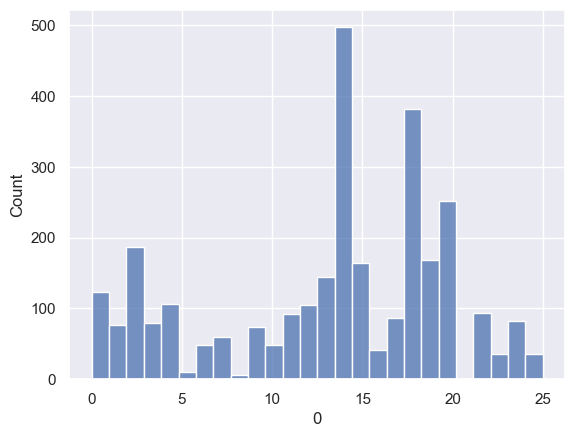

In [7]:
sns.histplot(df[0], bins=nb_classes)

In [8]:
def plot_img(df: pd.DataFrame, index: int) -> None:
    plt.figure(figsize=(1, 1))
    plt.axis("off")

    img = np.array(df)[index].reshape(img_shape)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

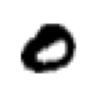

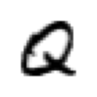

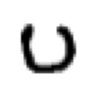

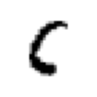

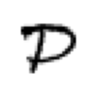

In [9]:
for i in range(5):
    plot_img(X, i)

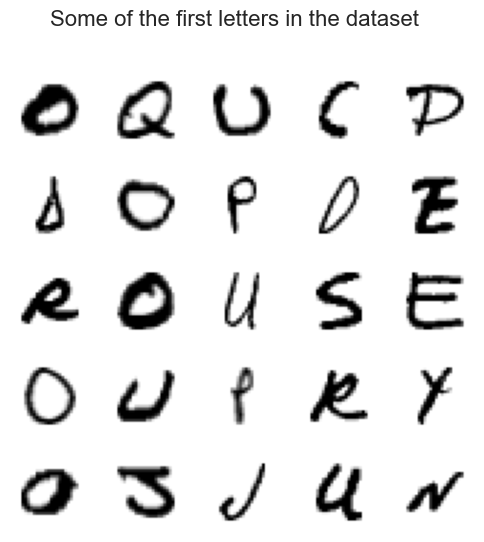

In [10]:
nb_rows = 5
nb_cols = 5

fig, axs = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    img = X.iloc[idx].to_numpy().reshape(img_shape)
    ax.imshow(img, cmap=plt.cm.binary)

    ax.axis("off")

_ = fig.suptitle("Some of the first letters in the dataset", fontsize=16)

## Create new letters

First, let us reduce the dimension

In [73]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
data = pca.fit_transform(X)

In [74]:
print(f"number of features:\nbefore {X.shape[1]}\nafter {data.shape[1]}")

number of features:
before 784
after 66


In [75]:
from sklearn.mixture import GaussianMixture

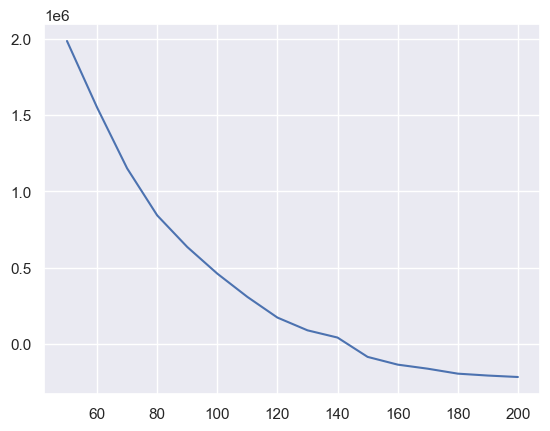

In [76]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

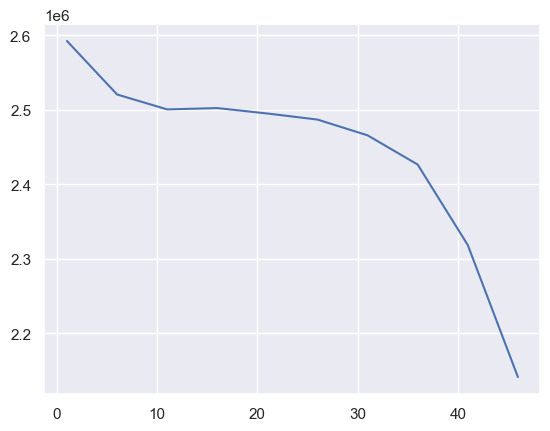

In [77]:
n_components = np.arange(1, 50, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [86]:
gmm = GaussianMixture(250, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [91]:
data_new, _labels = gmm.sample(100)
data_new.shape

(100, 66)

In [92]:
letters_new = pca.inverse_transform(data_new)

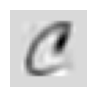

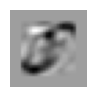

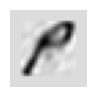

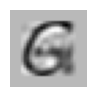

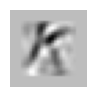

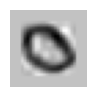

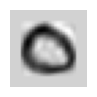

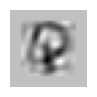

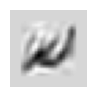

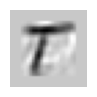

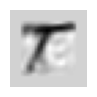

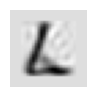

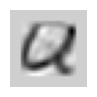

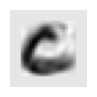

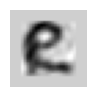

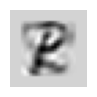

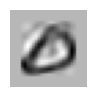

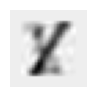

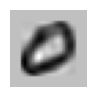

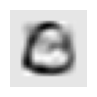

In [93]:
for i in range(20):
    plot_img(letters_new, i)